<a href="https://colab.research.google.com/github/HARSHROY28/Document-Clustering-for-Topic-Modeling/blob/main/LMS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tarfile
import os

# Path to the uploaded tar.gz file
tar_path = '/content/twenty_newsgroups/20_newsgroups.tar.gz'
extract_to = '/mnt/data/20_newsgroups'

# Extract the tar.gz file
with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall(path=extract_to)

# List the extracted files
extracted_files = os.listdir(extract_to)
extracted_files


['20_newsgroups']

In [ ]:
import pandas as pd

# Define a function to load text files from the extracted directory
def load_text_files(directory):
    data = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            with open(file_path, 'r', encoding='latin1') as f:
                text = f.read()
                data.append(text)
    return data

# Load the dataset
documents = load_text_files(extract_to)
df = pd.DataFrame({'text': documents})
print(df.head())


                                                text
0  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1  Xref: cantaloupe.srv.cs.cmu.edu alt.slack:7940...
2  Xref: cantaloupe.srv.cs.cmu.edu talk.politics....
3  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['text'])


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 100  # Define the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the top words in each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 100
display_topics(lda, vectorizer.get_feature_names_out(), num_top_words)


Topic 0:
acs magnus ohio state edu ins cwru autos university news 1993apr6 cis cmu 1993apr16 host nntp posting 1993apr15 rec sei cc sender club magnesium usenet test brian cs 1993apr26 srv 1993 12 fri 18 gmt mps zaphod million sat article cantaloupe war apr force organization andrew 53 order 49 subject date 24 newsgroups path message lines id car eric wasn face taken sent anti code personal 45 1993apr23 03 distribution writes na references evidence truth oh black net sun window mon john certain ans clear advance programs 10 months email service reston 13 military howland package air performance 26 says
Topic 1:
std world ufl ma edu unix com public access gif cmu cis cs uunet srv umd graphics 1993 tape cantaloupe net gmt usenet electronics thanks robert house ohio organization newsgroups subject richard 15 message date path apr id lines sci eng state 17 comp noc near references sat crabapple cd news gatech rec mps haven zaphod fs7 ece das city misc gtefsd europa boston harvard darwin kn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


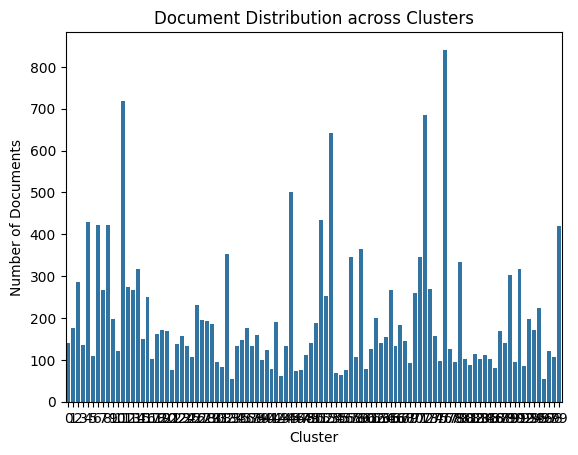

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

num_clusters = 100  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign each document to a cluster
df['cluster'] = kmeans.labels_

# Visualize the clusters
sns.countplot(x='cluster', data=df)
plt.title('Document Distribution across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Documents')
plt.show()
